In [34]:
using Meshes, Random, GeometryBasics, DelaunayTriangulation

In [214]:
include("voronoi_graph.jl")

extract_graph (generic function with 1 method)

In [266]:
bounds = Bounds(0.0,100.0,0.0,100.0)
N = 5
points = generate_start_sample(N,bounds)
vorn_diagram = generate_rect_vorn_diagram(points, bounds)
g, nodes, edge_list, polys = extract_graph(vorn_diagram)

(SimpleGraph{Int64}(16, [[2, 4, 6], [1, 3, 8], [2, 4, 10], [1, 3, 7], [6, 7], [1, 5], [4, 5, 11], [2, 9], [8, 10, 12], [3, 9, 11], [7, 10, 12], [9, 11]]), [(5.614042649, 0.0), (71.705968276, 0.0), (46.833832522, 56.678071117), (35.156957645, 58.635950647), (0.0, 100.0), (0.0, 0.0), (2.159918347, 100.0), (100.0, 0.0), (100.0, 52.606904963), (71.796805547, 76.895920093), (64.34598155, 100.0), (100.0, 100.0)], [(1, 2), (9, 10), (10, 11), (1, 4), (11, 12), (3, 10), (9, 12), (8, 9), (4, 7), (3, 4), (5, 6), (2, 8), (5, 7), (1, 6), (2, 3), (7, 11)], Dict{Any, Any}(5 => Any[(100.0, 100.0), (64.34598154977911, 100.0), (71.7968055473487, 76.89592009253441), (100.0, 52.60690496271434)], 4 => Any[(46.83383252156453, 56.67807111704024), (71.7968055473487, 76.89592009253441), (64.34598154977911, 100.0), (2.1599183468212715, 100.0), (35.156957644605896, 58.63595064680849)], 2 => Any[(0.0, 100.0), (0.0, 0.0), (5.614042648834701, 0.0), (35.156957644605896, 58.63595064680849), (2.1599183468212715, 100.0

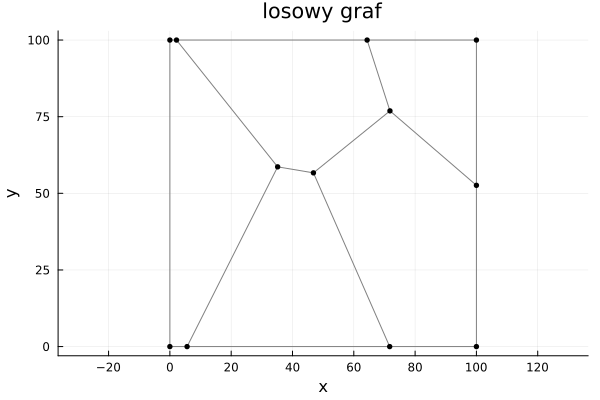

In [267]:
using Plots

# nodes  :: Vector{Tuple{Float64,Float64}}
# edge_list :: Vector{Tuple{Int,Int}}  (indices into `nodes`)

xs_nodes = first.(nodes)
ys_nodes = last.(nodes)

p = plot(; aspect_ratio=1, legend=false, xlabel="x", ylabel="y",
         title="losowy graf")

# edges
for (u, v) in edge_list
    plot!(p,
          [nodes[u][1], nodes[v][1]],
          [nodes[u][2], nodes[v][2]];
          color = :gray, label = "")
end

# nodes
scatter!(p, xs_nodes, ys_nodes; color=:black, markersize=3)

display(p)
# savefig(p, "voronoi_graph.png")  # optional

In [268]:
pl = polys[1]
xs = first.(pl)   
ys = last.(pl)
xmin,xmax,ymin,ymax = minimum(xs), maximum(xs), minimum(ys), maximum(ys)
bounds = ((xmin,ymin),(xmax,ymin),(xmax,ymax),(xmin,ymax))

((5.614042648834701, 0.0), (71.70596827598439, 0.0), (71.70596827598439, 58.63595064680849), (5.614042648834701, 58.63595064680849))

In [269]:
polys

Dict{Any, Any} with 5 entries:
  5 => Any[(100.0, 100.0), (64.346, 100.0), (71.7968, 76.8959), (100.0, 52.6069…
  4 => Any[(46.8338, 56.6781), (71.7968, 76.8959), (64.346, 100.0), (2.15992, 1…
  2 => Any[(0.0, 100.0), (0.0, 0.0), (5.61404, 0.0), (35.157, 58.636), (2.15992…
  3 => Any[(71.706, 0.0), (100.0, 0.0), (100.0, 52.6069), (71.7968, 76.8959), (…
  1 => Any[(5.61404, 0.0), (71.706, 0.0), (46.8338, 56.6781), (35.157, 58.636)]

In [299]:
nodes_list = []
edges_list = []
polys_2 = []

for i in values(polys)
    coords::Vector{Tuple{Float64,Float64}} = collect(i) 
    smpl = generate_sample(20, i, type = :sobol,oversample=2)
    vorn_diagram_2 = generate_vorn_diagram(smpl, coords)
    gs, ndes, edge_lst, pols = extract_graph(vorn_diagram_2)
    push!(polys_2,pols)
    push!(nodes_list, ndes)
    push!(edges_list, edge_lst)
end

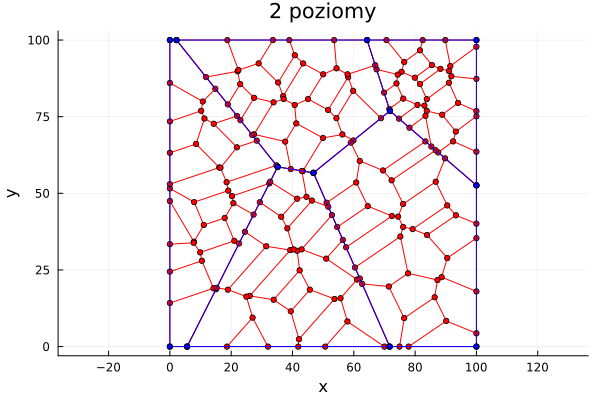

In [300]:
using Plots

function plot_graph!(p, nodes, edge_list; edgecolor=:gray, nodecolor=:black, label="")
    # edges
    for (u, v) in edge_list
        plot!(p,
            [nodes[u][1], nodes[v][1]],
            [nodes[u][2], nodes[v][2]];
            color=edgecolor, label="")
    end
    # nodes
    scatter!(p,
        first.(nodes), last.(nodes);
        color=nodecolor, markersize=3, label=label)
end

# assume (nodes1, edges1) and (nodes2, edges2)
p = plot(; aspect_ratio=1, legend=false, xlabel="x", ylabel="y", title="2 poziomy")

for i in 1:length(nodes_list)
    plot_graph!(p, nodes_list[i], edges_list[i]; edgecolor=:red, nodecolor=:red)
end
plot_graph!(p, nodes, edge_list; edgecolor=:blue, nodecolor=:blue)

display(p)

In [289]:
third_polys = [poly for d in polys_2 for poly in values(d)]

50-element Vector{Vector{Any}}:
 [(87.54142718729815, 63.33641519786548), (100.0, 52.60690496271434), (100.0, 66.50549801396627), (93.861960928944, 68.02239497941277)]
 [(90.03527471719106, 76.53360107068602), (91.5177879229159, 77.6327236401612), (93.1206960234883, 83.57464666778412), (84.46639699934035, 89.99085642288964), (83.345075928944, 89.15952032387025), (79.51838760926158, 74.9741735204774)]
 [(100.0, 88.67490308301414), (100.0, 100.0), (97.48532036280609, 100.0), (84.70719674630783, 90.52643591276232), (84.46639699934035, 89.99085642288964), (93.1206960234883, 83.57464666778412)]
 [(72.86213630115387, 100.0), (77.03495092894401, 90.71894497941277), (83.345075928944, 89.15952032387025), (84.46639699934035, 89.99085642288964), (84.70719674630783, 90.52643591276232), (80.44782895753336, 100.0)]
 [(91.5177879229159, 77.6327236401612), (100.0, 75.53651987870114), (100.0, 88.67490308301414), (93.1206960234883, 83.57464666778412)]
 [(80.44782895753336, 100.0), (84.70719674630783, 90

In [293]:
nodes_list_2 = []
edges_list_2 = []

for i in third_polys
    coords::Vector{Tuple{Float64,Float64}} = collect(i) 
    smpl = generate_sample(3, i, type = :uniform,oversample=2)
    vorn_diagram_3 = generate_vorn_diagram(smpl, coords)
    gs, ndes, edge_lst, pols = extract_graph(vorn_diagram_3)
    push!(nodes_list_2, ndes)
    push!(edges_list_2, edge_lst)
end

In [294]:
edges_list_2

50-element Vector{Any}:
 [(4, 5), (1, 2), (7, 8), (6, 8), (3, 6), (3, 4), (1, 4), (5, 6), (2, 3), (2, 7)]
 [(1, 2), (9, 10), (1, 4), (5, 9), (3, 10), (7, 8), (8, 9), (3, 4), (5, 6), (4, 8), (2, 3), (6, 7)]
 [(4, 5), (1, 2), (9, 10), (7, 8), (8, 9), (3, 4), (1, 5), (4, 8), (2, 3), (5, 10), (3, 6), (6, 7)]
 [(4, 5), (1, 2), (9, 10), (7, 8), (8, 9), (4, 7), (3, 4), (1, 5), (2, 3), (5, 10), (3, 6), (6, 7)]
 [(4, 8), (1, 2), (7, 8), (2, 5), (3, 7), (6, 7), (3, 4), (1, 4), (5, 6), (2, 3)]
 [(4, 5), (1, 2), (3, 6), (6, 7), (3, 4), (1, 4), (5, 6), (2, 3), (2, 7)]
 [(4, 5), (1, 2), (6, 8), (9, 10), (7, 8), (4, 7), (3, 4), (5, 6), (1, 5), (2, 3), (7, 9), (8, 10)]
 [(4, 5), (1, 2), (6, 8), (8, 9), (3, 4), (1, 5), (4, 8), (5, 7), (3, 9), (2, 3), (6, 7)]
 [(4, 5), (1, 2), (7, 8), (6, 8), (3, 6), (3, 4), (1, 4), (5, 6), (2, 3), (2, 7)]
 [(4, 5), (1, 2), (6, 8), (8, 9), (3, 4), (1, 5), (4, 8), (5, 7), (3, 9), (2, 3), (6, 7)]
 ⋮
 [(6, 8), (1, 2), (9, 10), (1, 4), (7, 10), (8, 9), (4, 7), (3, 4), (5, 6

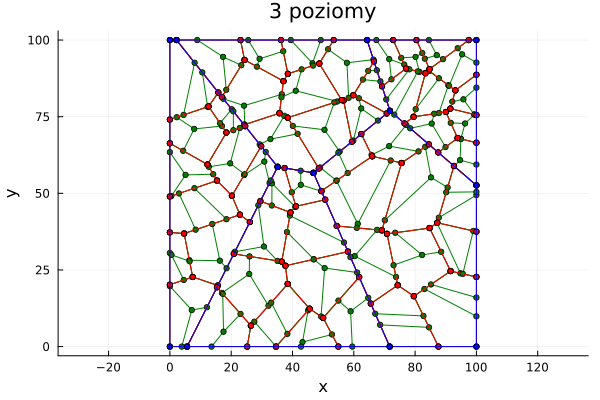

In [296]:
using Plots

function plot_graph!(p, nodes, edge_list; edgecolor=:gray, nodecolor=:black, label="")
    # edges
    for (u, v) in edge_list
        plot!(p,
            [nodes[u][1], nodes[v][1]],
            [nodes[u][2], nodes[v][2]];
            color=edgecolor, label="")
    end
    # nodes
    scatter!(p,
        first.(nodes), last.(nodes);
        color=nodecolor, markersize=3, label=label)
end

# assume (nodes1, edges1) and (nodes2, edges2)
p = plot(; aspect_ratio=1, legend=false, xlabel="x", ylabel="y", title="3 poziomy")

for i in 1:length(nodes_list_2)
    plot_graph!(p, nodes_list_2[i], edges_list_2[i]; edgecolor=:green, nodecolor=:green)
end

for i in 1:length(nodes_list)
    plot_graph!(p, nodes_list[i], edges_list[i]; edgecolor=:red, nodecolor=:red)
end
plot_graph!(p, nodes, edge_list; edgecolor=:blue, nodecolor=:blue)

display(p)